# Series de tiempo

## Imports

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

## Datos

In [2]:
path = "../DataSets/Clean_Energy.csv"
energia_df = pd.read_csv(path,sep=",",encoding="utf-8")

In [5]:
energia_df

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION
0,2001,1,AK,Total Electric Power Industry,Coal,46903.0
1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0
2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0
3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
4,2001,1,AK,Total Electric Power Industry,Wind,87.0
...,...,...,...,...,...,...
496769,2022,5,WY,"Electric Generators, Electric Utilities",Coal,2071403.0
496770,2022,5,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,96790.0
496771,2022,5,WY,"Electric Generators, Electric Utilities",Natural Gas,91570.0
496772,2022,5,WY,"Electric Generators, Electric Utilities",Petroleum,1812.0


## Crear nueva columna para fechas

Probar como se pueden convertir nuestros datos a fecha. 

In [25]:
x = pd.to_datetime(str(energia_df.iloc[0]['YEAR'])+"-"+str(energia_df.iloc[0]['MONTH'])+"-"+"1")
x

Timestamp('2001-01-01 00:00:00')

Usar pd.apply para crear una nueva columna de tipo datetime donde se guardara la fecha.

Esta fecha  esta compuesta de 2 columnas mas un valor albitrario por cuestiones de formato y necesidades de formato

Las columnas usadas son YEAR y MONTH mas el valor albitrario que en este caso es "1"

In [27]:
energia_df['DATE'] = energia_df.apply(lambda row: str(row['YEAR'])+"-"+str(row['MONTH'])+"-"+"1", axis=1)

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION,DATE
0,2001,1,AK,Total Electric Power Industry,Coal,46903.0,2001-1-1
1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0,2001-1-1
2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0,2001-1-1
3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0,2001-1-1
4,2001,1,AK,Total Electric Power Industry,Wind,87.0,2001-1-1
...,...,...,...,...,...,...,...
496769,2022,5,WY,"Electric Generators, Electric Utilities",Coal,2071403.0,2022-5-1
496770,2022,5,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,96790.0,2022-5-1
496771,2022,5,WY,"Electric Generators, Electric Utilities",Natural Gas,91570.0,2022-5-1
496772,2022,5,WY,"Electric Generators, Electric Utilities",Petroleum,1812.0,2022-5-1


Convertir el dato de la nueva columna a Datetime.

Se hizo en una celda aparte por problemas y tiempo de ejecucion

In [31]:
energia_df['DATE'] = pd.to_datetime(energia_df['DATE'])

Comprobar que efectivamente la nueva columna tiene un tipo de dato Datetime

In [30]:
energia_df.dtypes

YEAR                         int64
MONTH                        int64
STATE                       object
TYPE OF PRODUCER            object
ENERGY SOURCE               object
GENERATION                 float64
DATE                datetime64[ns]
dtype: object

## Creacion Series de tiempo

In [78]:
import statsmodels.api as sm

Nuevo Dataframe con solo DATE, ENERGY SOURCE y GENERATION

In [97]:
df_timeSeries_energySource = energia_df[['DATE', 'ENERGY SOURCE', 'GENERATION']].copy()

In [98]:
df_timeSeries_energySource

,DATE,ENERGY SOURCE,GENERATION
0,2001-01-01,Coal,46903.0
1,2001-01-01,Petroleum,71085.0
2,2001-01-01,Natural Gas,367521.0
3,2001-01-01,Hydroelectric Conventional,104549.0
4,2001-01-01,Wind,87.0
...,...,...,...
496769,2022-05-01,Coal,2071403.0
496770,2022-05-01,Hydroelectric Conventional,96790.0
496771,2022-05-01,Natural Gas,91570.0
496772,2022-05-01,Petroleum,1812.0


In [112]:
df_timeSeries_energyCoal = df_timeSeries_energySource.loc[df_timeSeries_energySource['ENERGY SOURCE'] == 'Coal']
df_timeSeries_energyCoal

,DATE,ENERGY SOURCE,GENERATION
0,2001-01-01,Coal,46903.0
6,2001-01-01,Coal,18410.0
12,2001-01-01,Coal,19742.0
15,2001-01-01,Coal,8751.0
21,2001-01-01,Coal,6557913.0
...,...,...,...
496743,2022-05-01,Coal,2979573.0
496748,2022-05-01,Coal,2149413.0
496757,2022-05-01,Coal,22823.0
496763,2022-05-01,Coal,55187.0


In [113]:
df_timeSeries_energyCoal = df_timeSeries_energyCoal.groupby(df_timeSeries_energyCoal['DATE'].dt.year).sum()
df_timeSeries_energyCoal

,GENERATION
DATE,
2001,7.615824e+09
2002,7.732521e+09
2003,7.894947e+09
2004,7.913202e+09
2005,8.051492e+09
2006,7.962045e+09
2007,8.065822e+09
2008,7.943205e+09
2009,7.023617e+09


In [102]:
df_timeSeries_energySource_year.dtypes

GENERATION    float64
dtype: object

(array([2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5, 2015. , 2017.5,
        2020. , 2022.5]),
 [Text(2000.0, 0, '2000.0'),
  Text(2002.5, 0, '2002.5'),
  Text(2005.0, 0, '2005.0'),
  Text(2007.5, 0, '2007.5'),
  Text(2010.0, 0, '2010.0'),
  Text(2012.5, 0, '2012.5'),
  Text(2015.0, 0, '2015.0'),
  Text(2017.5, 0, '2017.5'),
  Text(2020.0, 0, '2020.0'),
  Text(2022.5, 0, '2022.5')])

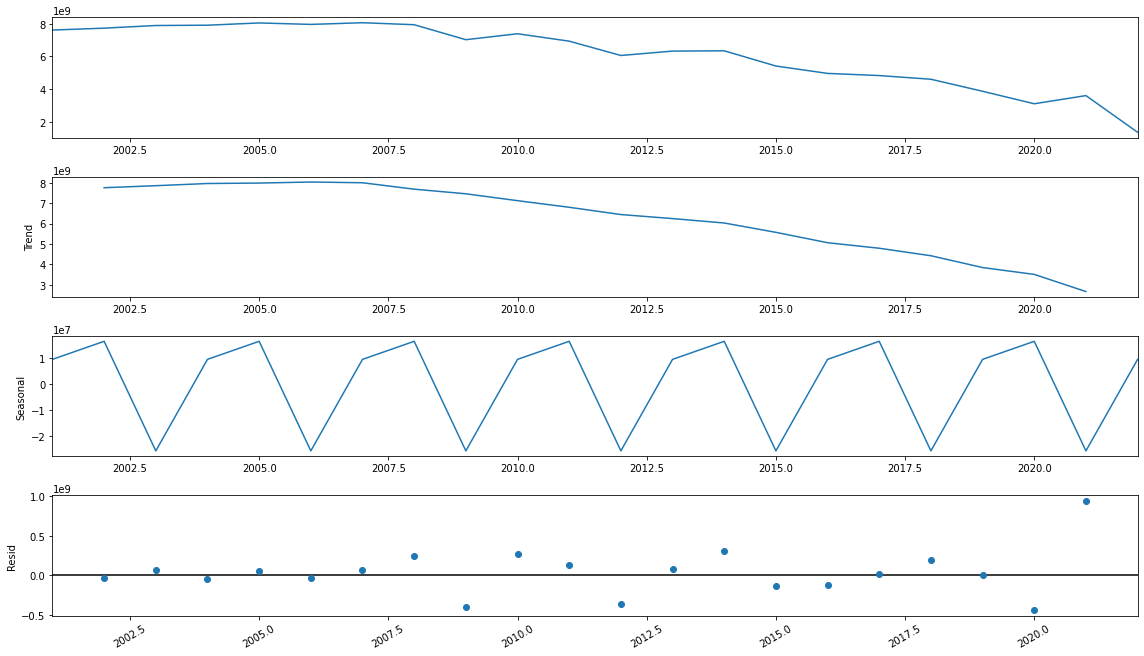

In [116]:
descomp1 = sm.tsa.seasonal_decompose(df_timeSeries_energyCoal, model='additive', period=3)
plt.rcParams["figure.figsize"] = [16,9]

descomp1.plot()
plt.xticks(rotation = 30)

In [74]:
df_timeSeries_energySource

,DATE,ENERGY SOURCE,GENERATION
0,2001-01-01,Coal,46903.0
1,2001-01-01,Petroleum,71085.0
2,2001-01-01,Natural Gas,367521.0
3,2001-01-01,Hydroelectric Conventional,104549.0
4,2001-01-01,Wind,87.0
...,...,...,...
496769,2022-05-01,Coal,2071403.0
496770,2022-05-01,Hydroelectric Conventional,96790.0
496771,2022-05-01,Natural Gas,91570.0
496772,2022-05-01,Petroleum,1812.0


Queremos ver primero cual es la generacion de tipo de energia por un periodo determinado de  tiempo

Basicamente un group by de DATE, ENERGY SOURCE y GENERATION

In [57]:
energy_df_groupbyYear = energia_df.groupby([energia_df['DATE'].dt.year, "ENERGY SOURCE"])['GENERATION'].mean()